In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('data/pieman_data/*.nii')
#data_files = ['data/pieman_data/sub-001-task-intact1.nii', 'data/pieman_data/sub-002-task-intact1.nii']

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files, num_factors=25)

In [6]:
prior_sample, _ = htfa.sample(posterior_predictive=False)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

prior_sample

04/06/2018 10:59:49 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.38149561e+03
04/06/2018 10:59:49 Prior Reconstruction Error (Frobenius Norm) for subject 1: 5.39408447e+03
04/06/2018 10:59:50 Prior Reconstruction Error (Frobenius Norm) for subject 2: 5.67139551e+03


Trace{'template_factor_centers': Normal([torch.FloatTensor of size 25x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 25]), 'voxel_noise': Normal([torch.FloatTensor of size 3]), 'Weights0': Normal([torch.FloatTensor of size 300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 25]), 'Weights1': Normal([torch.FloatTensor of size 300x25]), 'FactorCenters1': Normal([torch.FloatTensor of size 25x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 25]), 'Weights2': Normal([torch.FloatTensor of size 300x25]), 'FactorCenters2': Normal([torch.FloatTensor of size 25x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 25]), 'Y0': Normal([torch.FloatTensor of size 300x94537]), 'Y1': Normal([torch.FloatTensor of size 300x95754]), 'Y2': Normal([torch.FloatTensor of size 300x101069])}

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


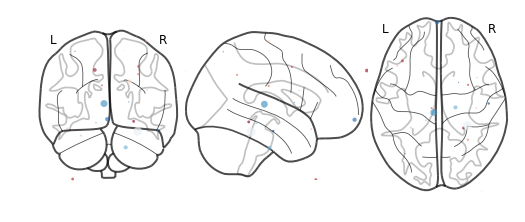

In [7]:
htfa.plot_factor_centers(trace=prior_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


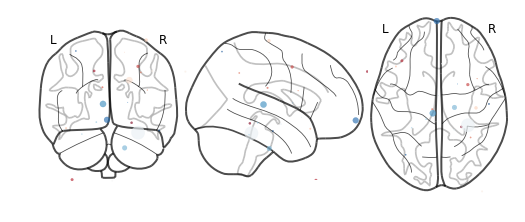

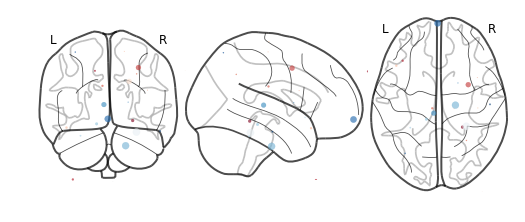

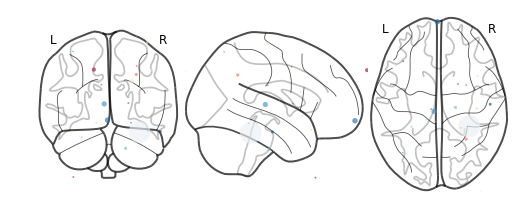

In [8]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=prior_sample)

In [9]:
del prior_sample

In [10]:
variational_sample, _ = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            variational_sample['Y%d' % s].value.data.cpu().numpy() -
            htfa.voxel_activations[s].numpy()
        )
    )

variational_sample

04/06/2018 10:59:56 Prior Reconstruction Error (Frobenius Norm) for subject 0: 1.74726172e+04
04/06/2018 10:59:56 Prior Reconstruction Error (Frobenius Norm) for subject 1: 1.53545459e+04
04/06/2018 10:59:56 Prior Reconstruction Error (Frobenius Norm) for subject 2: 1.60902266e+04


Trace{'template_factor_centers': Normal([torch.FloatTensor of size 1x25x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 1x25]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'Weights0': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x25]), 'Weights1': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters1': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 1x25]), 'Weights2': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters2': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 1x25]), 'Y0': Normal([torch.FloatTensor of size 1x300x94537]), 'Y1': Normal([torch.FloatTensor of size 1x300x95754]), 'Y2': Normal([torch.FloatTensor of size 1x300x101069])}

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


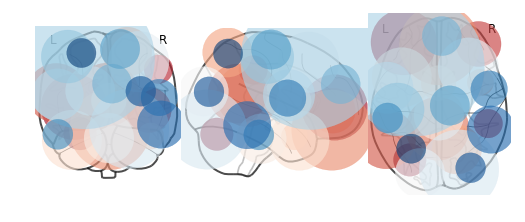

In [11]:
htfa.plot_factor_centers(trace=variational_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


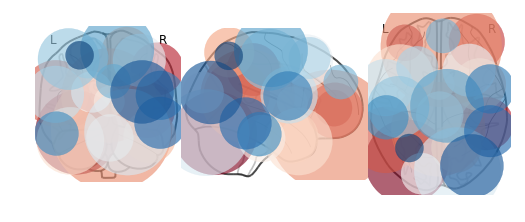

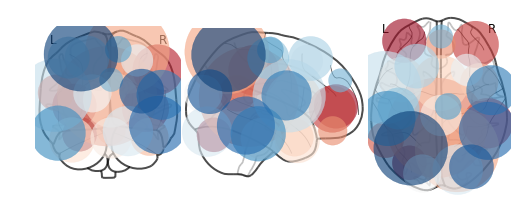

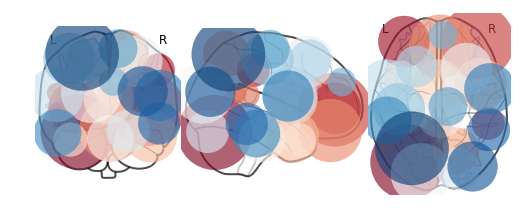

In [12]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=variational_sample)

In [13]:
del variational_sample

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


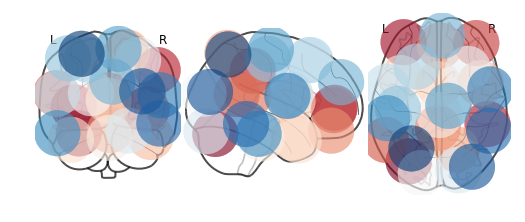

In [14]:
htfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


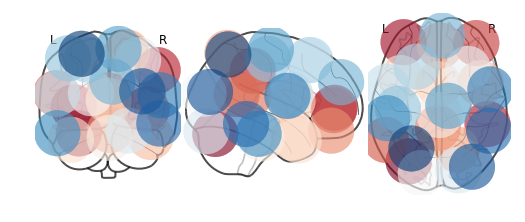

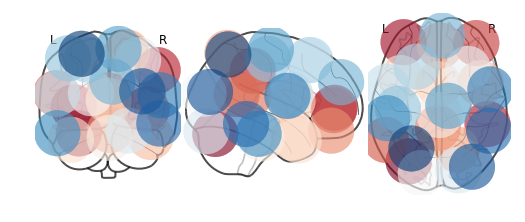

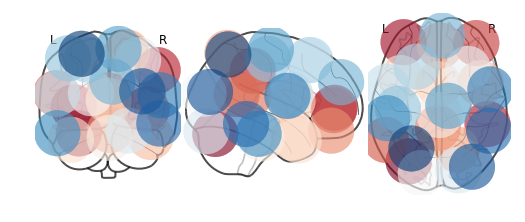

In [15]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s)

In [16]:
losses = htfa.train(num_steps=200, learning_rate=1e-1, log_level=logging.INFO, num_particles=4,
                    use_cuda=True)

04/06/2018 11:00:02 [Epoch 1] (452ms) Posterior free-energy 3.85750303e+10
04/06/2018 11:00:03 [Epoch 2] (309ms) Posterior free-energy 2.72323973e+10
04/06/2018 11:00:03 [Epoch 3] (304ms) Posterior free-energy 2.33471488e+10
04/06/2018 11:00:03 [Epoch 4] (305ms) Posterior free-energy 1.96200940e+10
04/06/2018 11:00:04 [Epoch 5] (303ms) Posterior free-energy 1.55192381e+10
04/06/2018 11:00:04 [Epoch 6] (303ms) Posterior free-energy 1.36663296e+10
04/06/2018 11:00:04 [Epoch 7] (304ms) Posterior free-energy 1.20033393e+10
04/06/2018 11:00:04 [Epoch 8] (303ms) Posterior free-energy 1.11887555e+10
04/06/2018 11:00:05 [Epoch 9] (302ms) Posterior free-energy 9.76394650e+09
04/06/2018 11:00:05 [Epoch 10] (303ms) Posterior free-energy 8.81053798e+09
04/06/2018 11:00:05 [Epoch 11] (305ms) Posterior free-energy 8.22507008e+09
04/06/2018 11:00:06 [Epoch 12] (304ms) Posterior free-energy 7.61188659e+09
04/06/2018 11:00:06 [Epoch 13] (310ms) Posterior free-energy 7.15435725e+09
04/06/2018 11:00:06 [

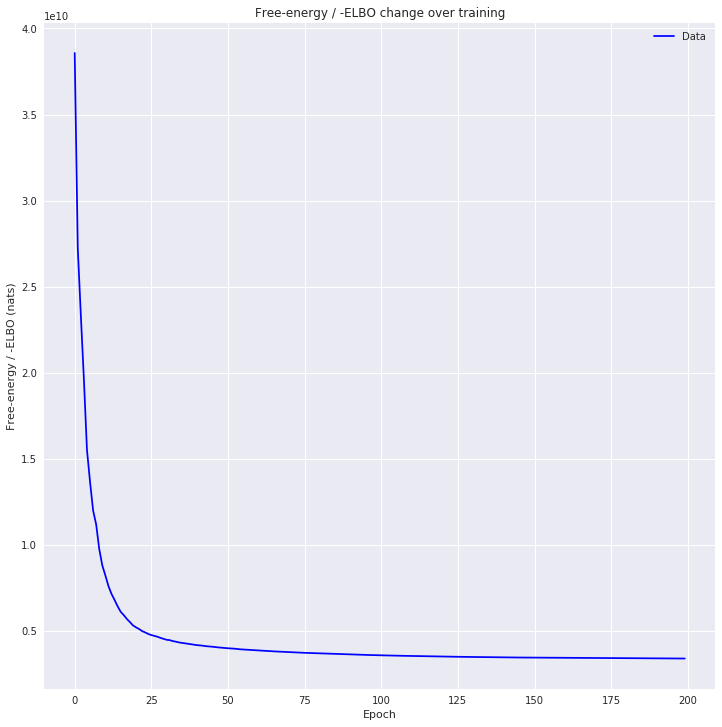

In [17]:
utils.plot_losses(losses)

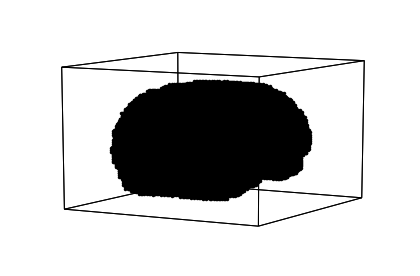

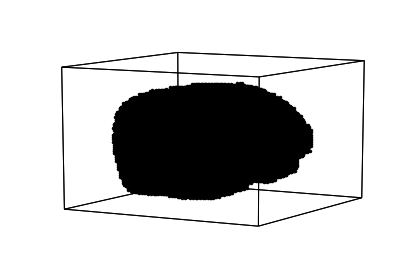

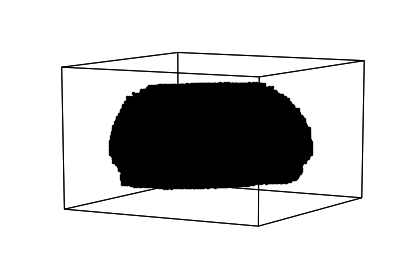

In [18]:
htfa.plot_voxels()

In [19]:
posterior_sample, q = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Posterior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

04/06/2018 11:01:11 Posterior Reconstruction Error (Frobenius Norm) for subject 0: 4.81044922e+03
04/06/2018 11:01:11 Posterior Reconstruction Error (Frobenius Norm) for subject 1: 4.91093408e+03
04/06/2018 11:01:11 Posterior Reconstruction Error (Frobenius Norm) for subject 2: 4.90220947e+03


Trace{'template_factor_centers': Normal([torch.FloatTensor of size 1x25x3]), 'template_factor_log_widths': Normal([torch.FloatTensor of size 1x25]), 'voxel_noise': Normal([torch.FloatTensor of size 1x3]), 'Weights0': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x25]), 'Weights1': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters1': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths1': Normal([torch.FloatTensor of size 1x25]), 'Weights2': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters2': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths2': Normal([torch.FloatTensor of size 1x25]), 'Y0': Normal([torch.FloatTensor of size 1x300x94537]), 'Y1': Normal([torch.FloatTensor of size 1x300x95754]), 'Y2': Normal([torch.FloatTensor of size 1x300x101069])}

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


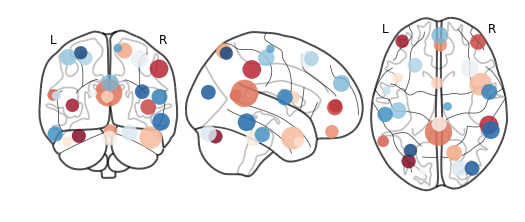

In [20]:
htfa.plot_factor_centers(trace=posterior_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


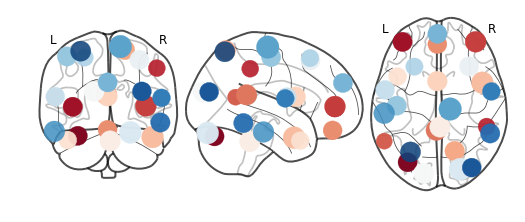

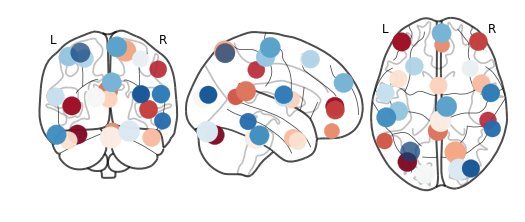

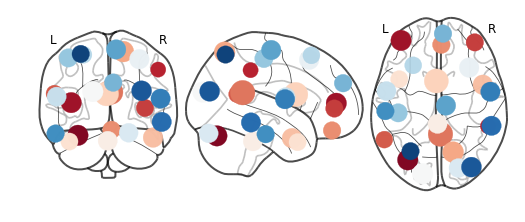

In [21]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=posterior_sample)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


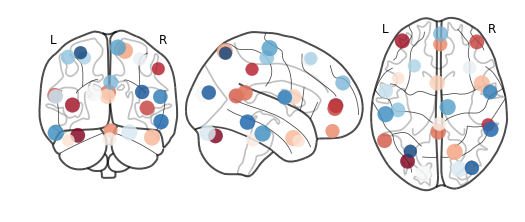

In [22]:
htfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


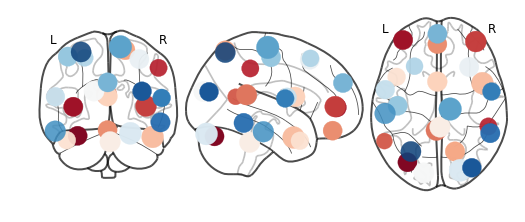

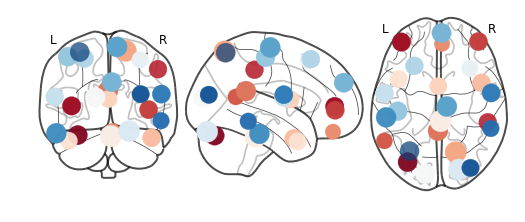

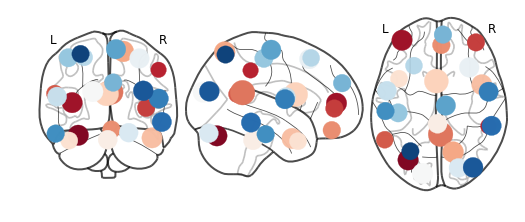

In [23]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s)

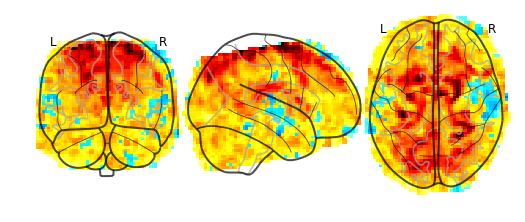

04/06/2018 11:02:47 Reconstruction Error (Frobenius Norm): 4.77705273e+03


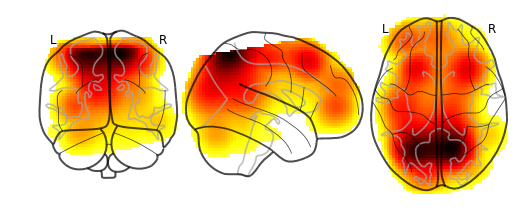

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


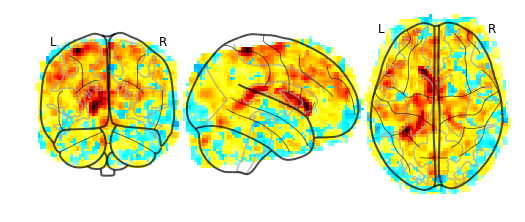

04/06/2018 11:03:02 Reconstruction Error (Frobenius Norm): 4.87882471e+03


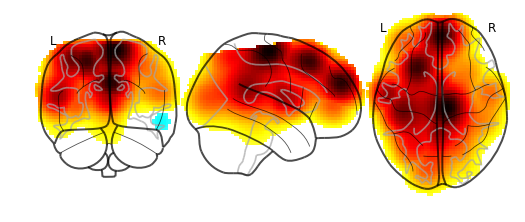

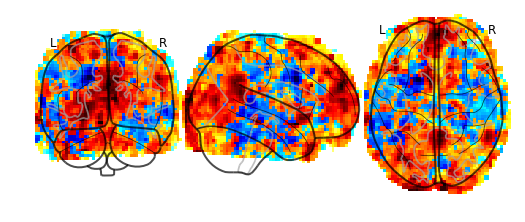

04/06/2018 11:03:17 Reconstruction Error (Frobenius Norm): 4.86965869e+03


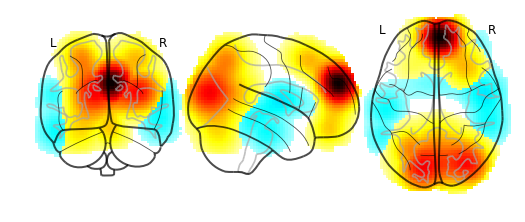

In [26]:
for s in range(htfa.num_subjects):
    htfa.plot_original_brain(s)
    htfa.plot_reconstruction(s)